In [6]:
import numpy as np

def f(x):
    return( x**7 + 3*x**6 + 7*x**5 + x**4 + 5*x**3 + 2*x**2 + 5**x + 5 )

def f2(x):
    return x - np.log(-x)

# Creo que esto se puede hacer mas eficientemente con apuntadores. Podria intentar hacerlo en C, sirve que practico jaja
def muller(p, x0, x1, x2, paro, maxiter):
    i = 0 # contador de iteraciones
    parabolas = [] # historial de parabolas 
    # puntos:
    f0 = [x0, p(x0)] 
    f1 = [x1, f(x1)]
    f2 = [x2, f(x2)]
    
    while True:
        i = i+1
        delta01 = x1 - x0
        delta12 = x2 - x1
        # pendientes entre los puntos
        m01 = (f1[1] - f0[1]) / delta01
        m12 = (f2[1] - f1[1]) / delta12
        # Componentes de la parabola
        a = (m01 - m12) / (delta12 - delta01)
        b = a*delta12 + m12
        c = f2[1]

        if b >= 0:
            denom = b + (b**2 - 4*a*c)**(1/2)
        else:
            denom = b - (b**2 - 4*a*c)**(1/2)

        x3 = x2 - (2*c / denom)  

        if i > maxiter or abs(x3 - x2) <= paro:
            break
        
        else:
            parabolas.append({
                'puntos' : [x0, x1, x2],
                'a' : a,
                'b' : b,
                'c' : c
            })
            
            x0 = x1
            x1 = x2
            x2 = x3    
        
        return parabolas


inicial0 = -2
inicial1 = 0
inicial2 = 2
ejemplo = muller(f2, inicial0, inicial1, inicial2, 10**-3, 10)

'''
Quiero terminar con el historial de parabolas

{
    puntos : []
    a : ...
    b : ...
    c : ...

}
'''

'\nQuiero terminar con el historial de parabolas\n\n{\n    puntos : []\n    a : ...\n    b : ...\n    c : ...\n\n}\n'

**GRAFICA**

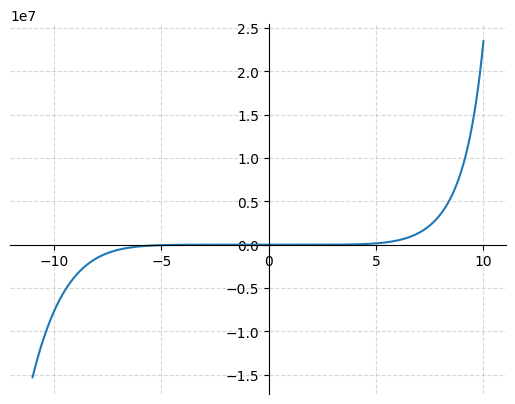

In [4]:
import matplotlib.pyplot as plt

xs = np.linspace(-11,10,5000)
y = f(xs)

# plot init
fig, ax = plt.subplots()

# plot config
ax.grid(True, which="both", linestyle="--", alpha=0.5)
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.plot(xs, y)